<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Juan Pablo Ospina.
<br>
<i><b>Asignatura:</b></i> Inteligencia Artificial
<br>
<i><b>Estudiante:</b></i> Diana Carolina Quintero Bedoya.
<br>
<i><b>Estudiante:</b></i> Juan Carlos Tarazona.
<br>
<i><b>Estudiante:</b></i> David Fernando Cruz Martinez.
<br>
<i><b>Parcial 2 </b></i>
</FONT>
</div>

In [ ]:
!pip3 install numpy scipy patsy pandas
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
^C
ERROR: Operation cancelled by user


# __Librerias__

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statistics
from pandas import DataFrame
from sklearn.metrics import pairwise_distances, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, SGDRegressor
from joblib import dump
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.api import qqplot
from itertools import combinations
from seaborn.distributions import kdeplot
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

#**Punto 1**

# __Preparación de los datos__

> Cargue los datos en un DataFrame y asigne los nombres a las columnas.


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/housing2.csv")
df

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,"$215000,0"
1,5,6,882.0,Y,896,"$105000,0"
2,6,6,1329.0,Y,1329,"$172000,0"
3,7,5,2110.0,Y,2110,"$244000,0"
4,5,5,928.0,Y,1629,"$189900,0"
...,...,...,...,...,...,...
2925,6,6,1003.0,Y,1003,"$142500,0"
2926,5,5,864.0,Y,902,"$131000,0"
2927,5,5,912.0,Y,970,"$132000,0"
2928,5,5,1389.0,Y,1389,"$170000,0"


> Genere un resumen de los datos a través del método info()y verifique si el tipo de datos de
cada columna es correcto.

In [ ]:
df=df.replace('\$','',regex=True)
df=df.replace(',','.',regex=True)

In [ ]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000.0
1,5,6,882.0,Y,896,105000.0
2,6,6,1329.0,Y,1329,172000.0
3,7,5,2110.0,Y,2110,244000.0
4,5,5,928.0,Y,1629,189900.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 137.5+ KB


In [ ]:
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(df['Total Bsmt SF'].mean())

In [ ]:
df.describe()

,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area
count,2930.000000,2930.000000,2930.000000,2930.000000
mean,6.094881,5.563140,1051.614544,1499.690444
std,1.411026,1.111537,440.539845,505.508887
min,1.000000,1.000000,0.000000,334.000000
25%,5.000000,5.000000,793.000000,1126.000000
50%,6.000000,5.000000,990.000000,1442.000000
75%,7.000000,6.000000,1301.500000,1742.750000
max,10.000000,9.000000,6110.000000,5642.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2930 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 137.5+ KB


In [ ]:
df["SalePrice"] = pd.to_numeric(df["SalePrice"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2930 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 137.5+ KB


> Genere un conjunto de datos de prueba con el 20% de los datos disponibles. Recuerde no realizar
ningún cambio antes de dividir los datos. Todos los pasos posteriores se realizarán únicamente
sobre el conjunto de datos de entrenamiento. Los datos de prueba no deben manipularse bajo
ninguna circunstancia.

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=3, shuffle=True)

 * Pasamos las variables categoricas 'Y' y 'N' de la columna 'Central Air' a datos numéricos.
 > Si su valor es `1.0 = Y`
 >
 > Si su valor es `0.0 = N`

In [ ]:
enc = OrdinalEncoder(categories=[["N","Y"]])
enc.fit(train[["Central Air"]])

OrdinalEncoder(categories=[['N', 'Y']])

In [ ]:
enc.categories_

[array(['N', 'Y'], dtype=object)]

In [ ]:
train["Central Air"]=enc.transform(train[["Central Air"]])

In [ ]:
test["Central Air"]=enc.transform(test[["Central Air"]])

In [ ]:
train

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
2443,8,5,1044.0,1.0,1976,286000.0
1512,4,7,949.0,1.0,1292,108000.0
1411,5,5,864.0,0.0,864,99600.0
1374,4,4,0.0,1.0,1588,134432.0
1790,8,5,1686.0,1.0,1694,307000.0
...,...,...,...,...,...,...
2304,5,6,864.0,1.0,887,124500.0
968,9,5,1978.0,1.0,1978,425000.0
1667,5,5,950.0,1.0,950,119500.0
1688,8,5,1734.0,1.0,1734,318000.0


In [ ]:
train.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
2443,8,5,1044.0,1.0,1976,286000.0
1512,4,7,949.0,1.0,1292,108000.0
1411,5,5,864.0,0.0,864,99600.0
1374,4,4,0.0,1.0,1588,134432.0
1790,8,5,1686.0,1.0,1694,307000.0


¿Qué tratamiento daría a la característica Central Air?

RTA: En este caso podríamos ver el porcentaje de las casas que tienen aire acondicionado con el de las que no tienen.
Que viendo en este, podemos ver que hay un 93.3% de las casa con aire acondicionado, por lo que nos da a entender que estas se deben encontrar en una zona de calor, permitiendonos saber si tambien el hecho de que no tenga un aire acondicionado es un item para que la casa este con una mala calificación, o si esta casa no necesita aire acondicionado debido al lugar en el que se encuentra.

Verifique si existen valores faltantes. En caso de existir determine cual es la mejor estrategia a utilizar. Consulte las opciones de la clase SimpleImputer() disponible en Sklearn

In [ ]:
train.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [ ]:
simpleimputer = SimpleImputer(strategy="mean")

Realice el proceso de escalado de los datos utilizando la clase StandarScaler()

In [ ]:
standarscaler = StandardScaler()

Construya un pipeline que incluya los pasos de imputación de valores faltantes y el proceso de
escalado

In [ ]:
preprocessor = Pipeline(
    steps=[("numerical_imputer", simpleimputer),
           ("scaler", standarscaler)])
preprocessor

Pipeline(steps=[('numerical_imputer', SimpleImputer()),
                ('scaler', StandardScaler())])

Realice las transformaciones sobre los datos de entrenamiento utilizando el pipeline

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 2443 to 1898
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2344 non-null   int64  
 1   Overall Cond   2344 non-null   int64  
 2   Total Bsmt SF  2344 non-null   float64
 3   Central Air    2344 non-null   float64
 4   Gr Liv Area    2344 non-null   int64  
 5   SalePrice      2344 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 128.2 KB


In [ ]:
transformed_train = preprocessor.fit_transform(train[['Overall Qual',
                                                       'Overall Cond',
                                                       "Total Bsmt SF",
                                                       "Central Air",
                                                       'Gr Liv Area']])
transformed_train = pd.DataFrame(transformed_train, columns=['Overall Qual',
                                                             'Overall Cond',
                                                             "Total Bsmt SF",
                                                             "Central Air",
                                                             'Gr Liv Area'],
                                 index=train.index)
transformed_train['SalePrice'] = train['SalePrice']
transformed_train.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
2443,1.359084,-0.506931,-0.022377,0.268846,0.929475,286000.0
1512,-1.471385,1.259979,-0.235054,0.268846,-0.401542,108000.0
1411,-0.763768,-0.506931,-0.425344,-3.719603,-1.234401,99600.0
1374,-1.471385,-1.390386,-2.359584,0.268846,0.174454,134432.0
1790,1.359084,-0.506931,1.414871,0.268846,0.380723,307000.0


In [ ]:
transformed_train.shape

(2344, 6)

# __Análisis exploratorio__

Genere un resumen estadístico utilizando el método describe()

In [ ]:
transformed_train.describe()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
count,2.344000e+03,2.344000e+03,2.344000e+03,2.344000e+03,2.344000e+03,2344.000000
mean,2.425061e-16,-3.395085e-16,9.700242e-17,-1.591446e-16,-5.607952e-17,180620.603242
std,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,1.000213e+00,81141.534863
min,-3.594236e+00,-4.040751e+00,-2.359584e+00,-3.719603e+00,-2.265744e+00,12789.000000
25%,-7.637676e-01,-5.069312e-01,-5.781353e-01,2.688459e-01,-7.347827e-01,129000.000000
50%,-5.615050e-02,-5.069312e-01,-1.410284e-01,2.688459e-01,-1.135440e-01,160000.000000
75%,6.514666e-01,3.765237e-01,5.462536e-01,2.688459e-01,4.896949e-01,213492.500000
max,2.774318e+00,3.026888e+00,1.131889e+01,2.688459e-01,8.063261e+00,755000.000000


Genere el histograma de frecuencias para todas las características disponibles

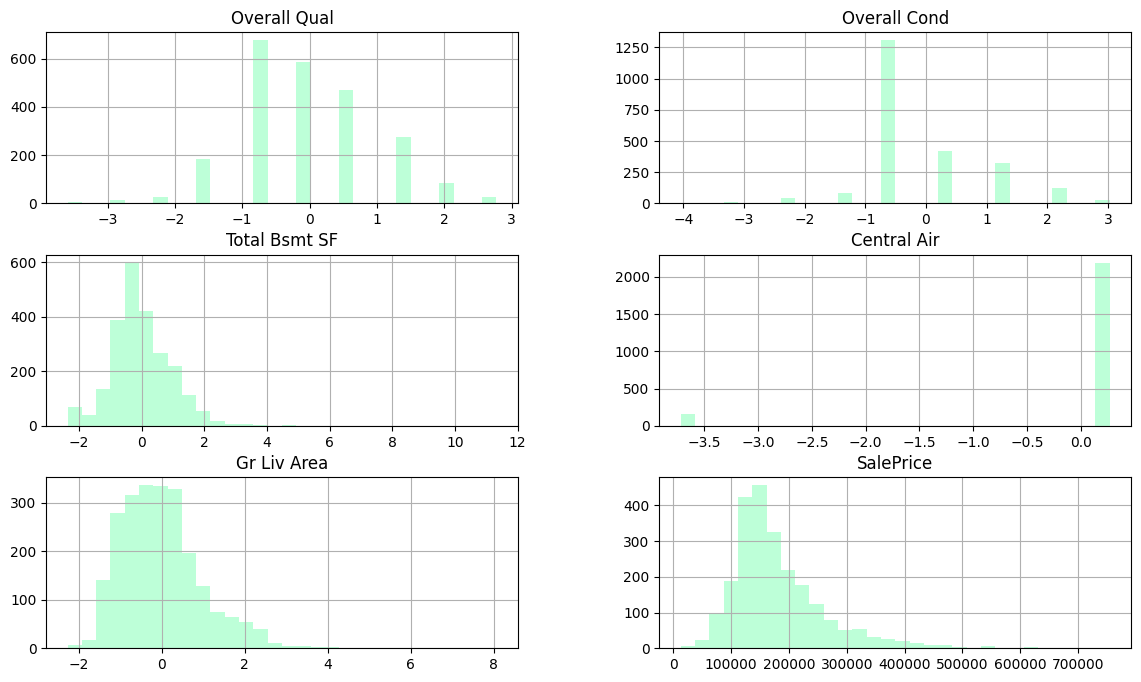

In [ ]:
transformed_train.hist(bins=30, figsize=(14,8), color="#7DFFB3", alpha=0.5)
plt.show()

Identifique posibles valores atípicos en los datos. Elimine los valores utilizando el método IQR (si
lo considera necesario)


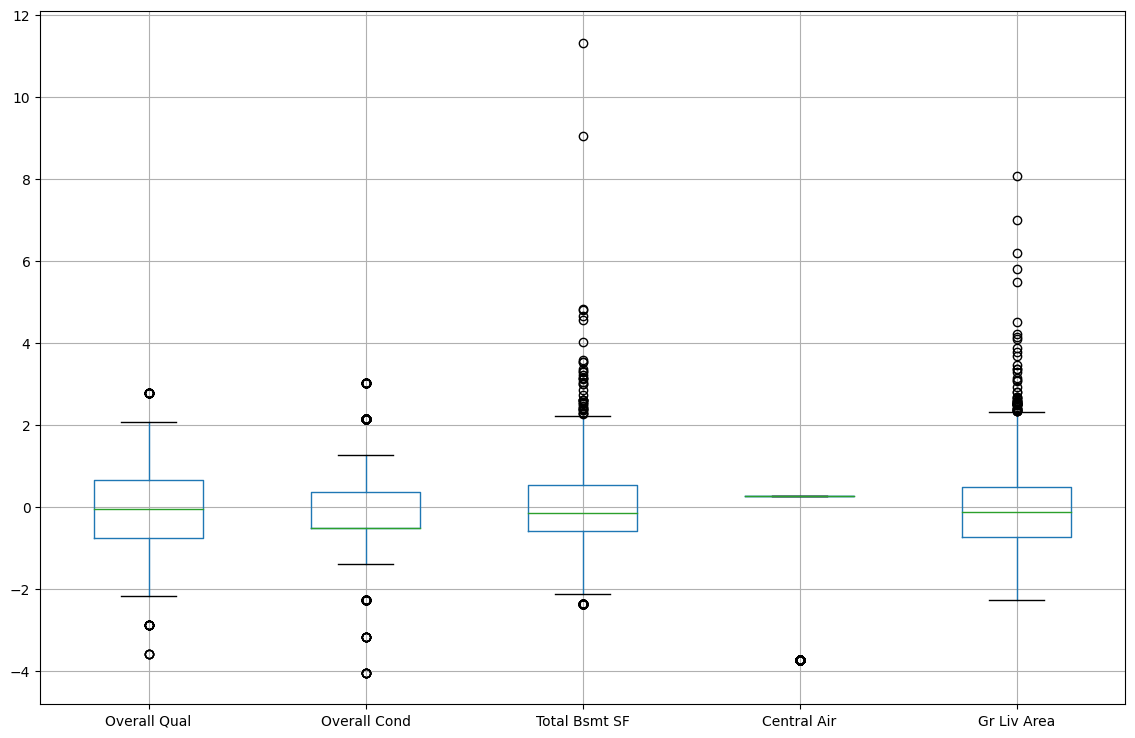

In [ ]:
transformed_train[['Overall Qual',
                    'Overall Cond',
                    "Total Bsmt SF",
                    "Central Air",
                    'Gr Liv Area']].boxplot(figsize=(14,9))
plt.show()

In [ ]:
Q1 = transformed_train.quantile(0.25)
Q3 = transformed_train.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [ ]:
#transformed_train = transformed_train[~((transformed_train < lower_limit) |(transformed_train > upper_limit)).any(axis=1)]
transformed_train.shape

(2344, 6)

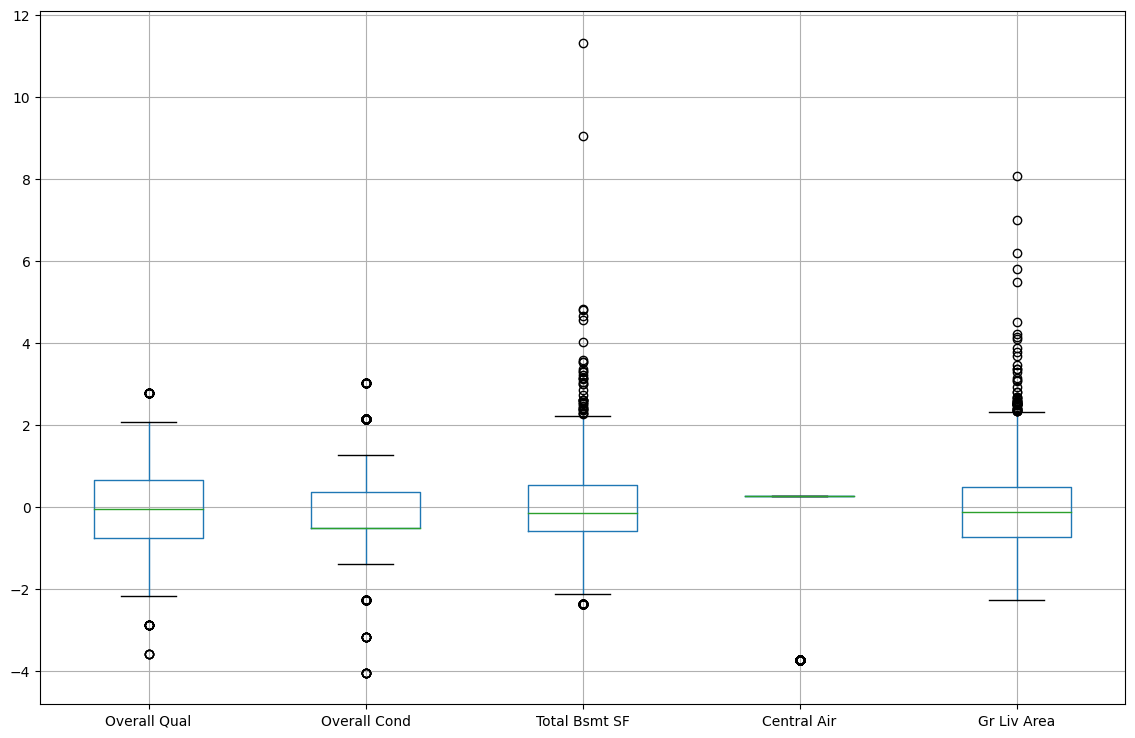

In [ ]:
transformed_train[['Overall Qual',
                    'Overall Cond',
                    "Total Bsmt SF",
                    "Central Air",
                    'Gr Liv Area']].boxplot(figsize=(14,9))
plt.show()

Genere una matriz de dispersión para identificar correlaciones entre variables.

KeyboardInterrupt: 

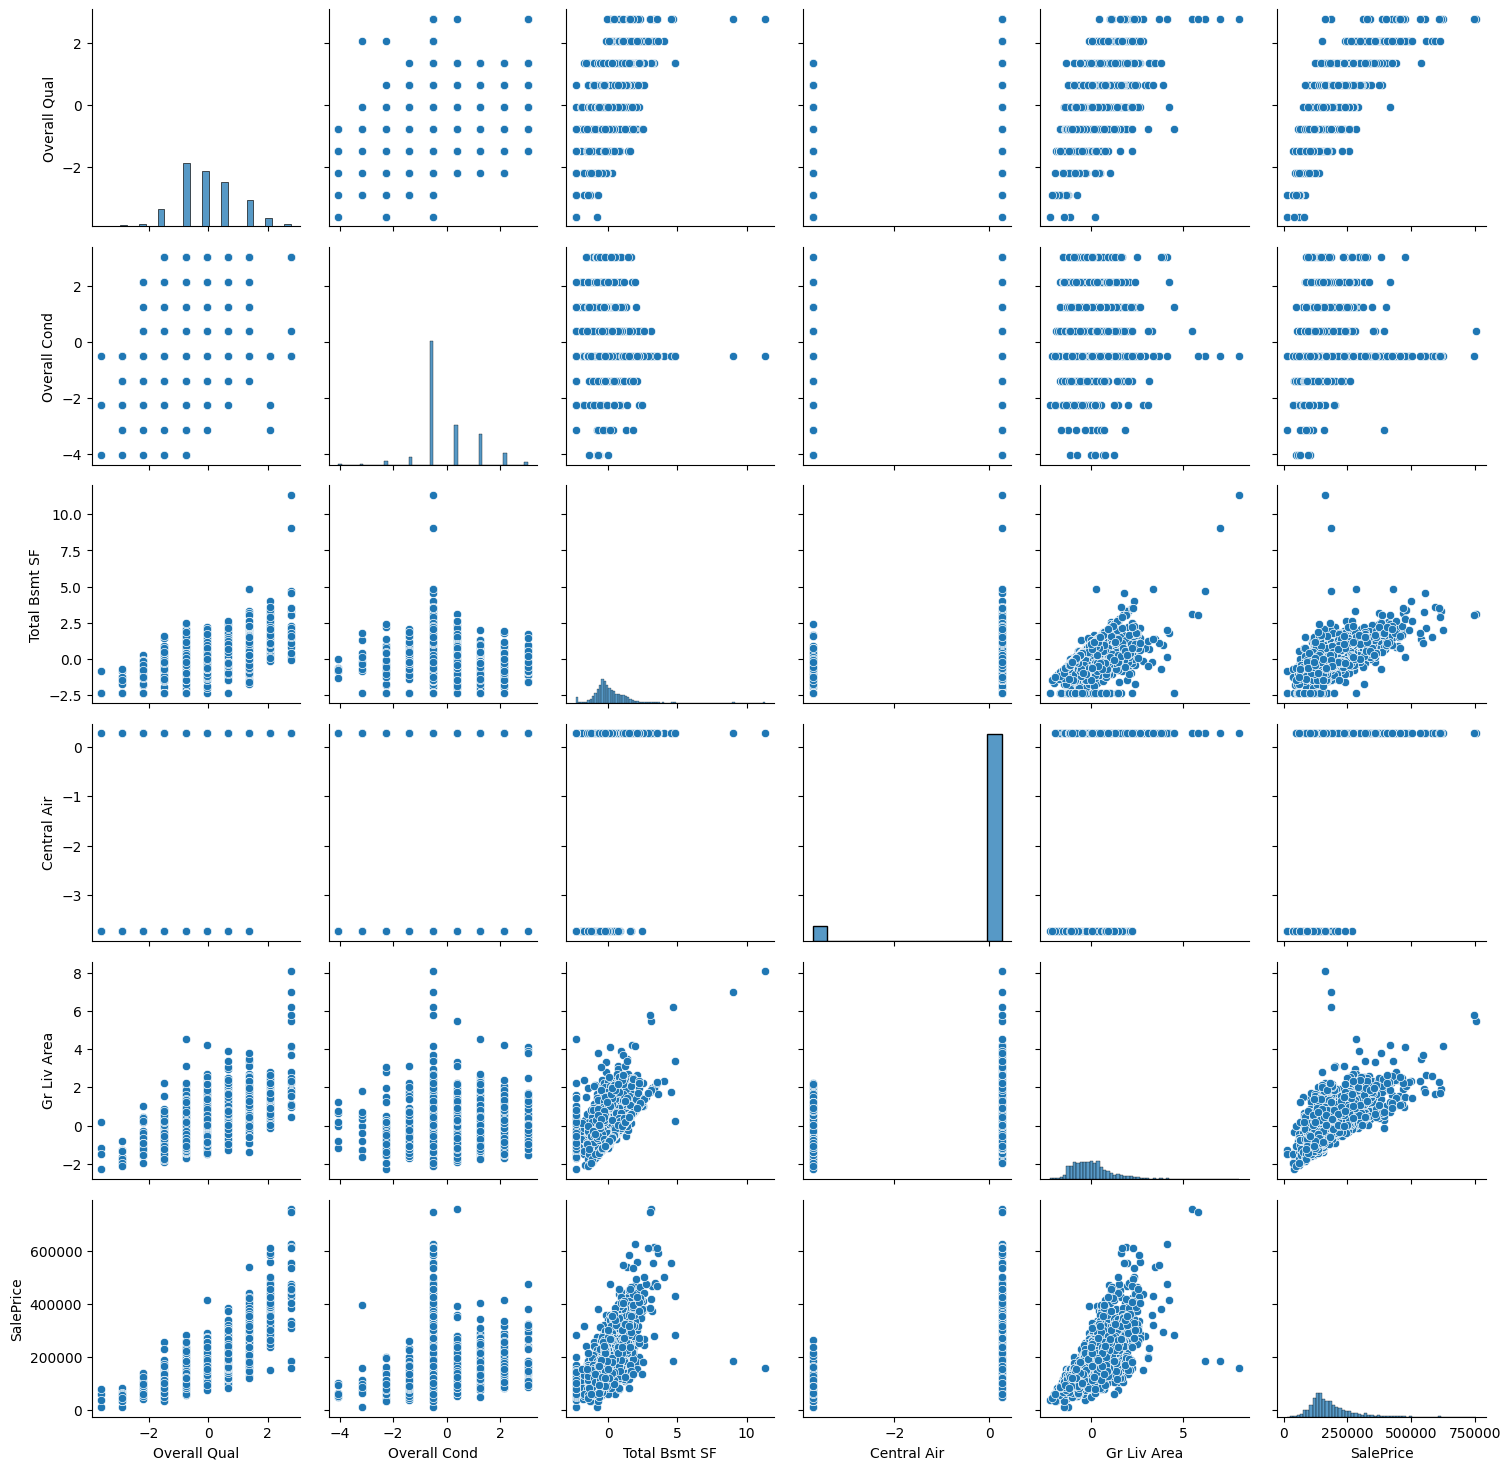

In [ ]:
sns.pairplot(transformed_train)

Genere la matriz de correlación para todas las características y preséntela a través de un mapa
de calor.

In [ ]:
transformed_train.corr()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
Overall Qual,1.000000,-0.094340,0.549224,0.292027,0.581351,0.798626
Overall Cond,-0.094340,1.000000,-0.172952,0.134783,-0.125590,-0.097876
Total Bsmt SF,0.549224,-0.172952,1.000000,0.225107,0.458665,0.625157
Central Air,0.292027,0.134783,0.225107,1.000000,0.130098,0.265158
Gr Liv Area,0.581351,-0.125590,0.458665,0.130098,1.000000,0.708178
SalePrice,0.798626,-0.097876,0.625157,0.265158,0.708178,1.000000


In [ ]:
transformed_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
Overall Qual     0.798626
Gr Liv Area      0.708178
Total Bsmt SF    0.625157
Central Air      0.265158
Overall Cond    -0.097876
Name: SalePrice, dtype: float64

<AxesSubplot: >

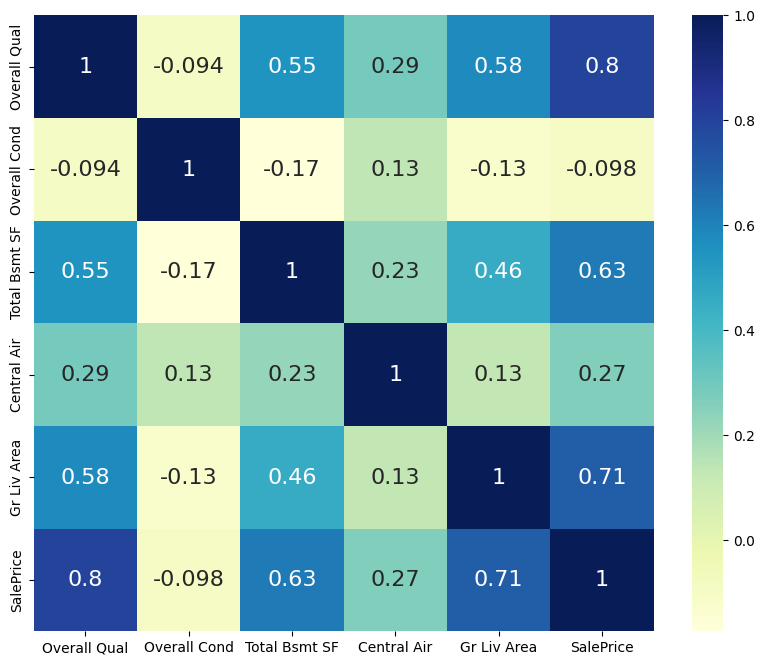

In [ ]:
plt.figure(figsize=(10, 8))
plt.rc({'size': '18'})
sns.heatmap(transformed_train.corr(), annot=True, cmap="YlGnBu", annot_kws={"size":16})

Considerando los valores de correlación determine cuales variables podrían tener una mayor
influencia sobre el modelo.

RTA: Tomando la cantidad porcentual que interfiere cada variables con las demás y viendo si sus números son más aproximados a 1 o -1, podemos evidenciar que las 2 variables que más influyen durante todo el modelo son el Overall qual y de igual manera SalePrice, observando sus recuadros mayormente azules.

# __Generar el modelo__

Construya un modelo para cada una de las posibles combinaciones de características. Utilice el pipeline de preprocesamiento generado en el paso anterior y agregue el estimador
correspondiente.

In [ ]:
model_result = {}
X_train, y_train = train.drop('SalePrice', axis='columns'), train['SalePrice']

In [ ]:
for feature in X_train.columns:

  regressorSGD = Pipeline(steps=[("numerical_imputer",
                                  SimpleImputer(strategy='mean')),
                                 ("scaler", StandardScaler()),
                                 ("sgd", SGDRegressor())])
  regressorSGD.fit(X_train[feature].values.reshape(-1,1), y_train)
  model_result[feature] = regressorSGD

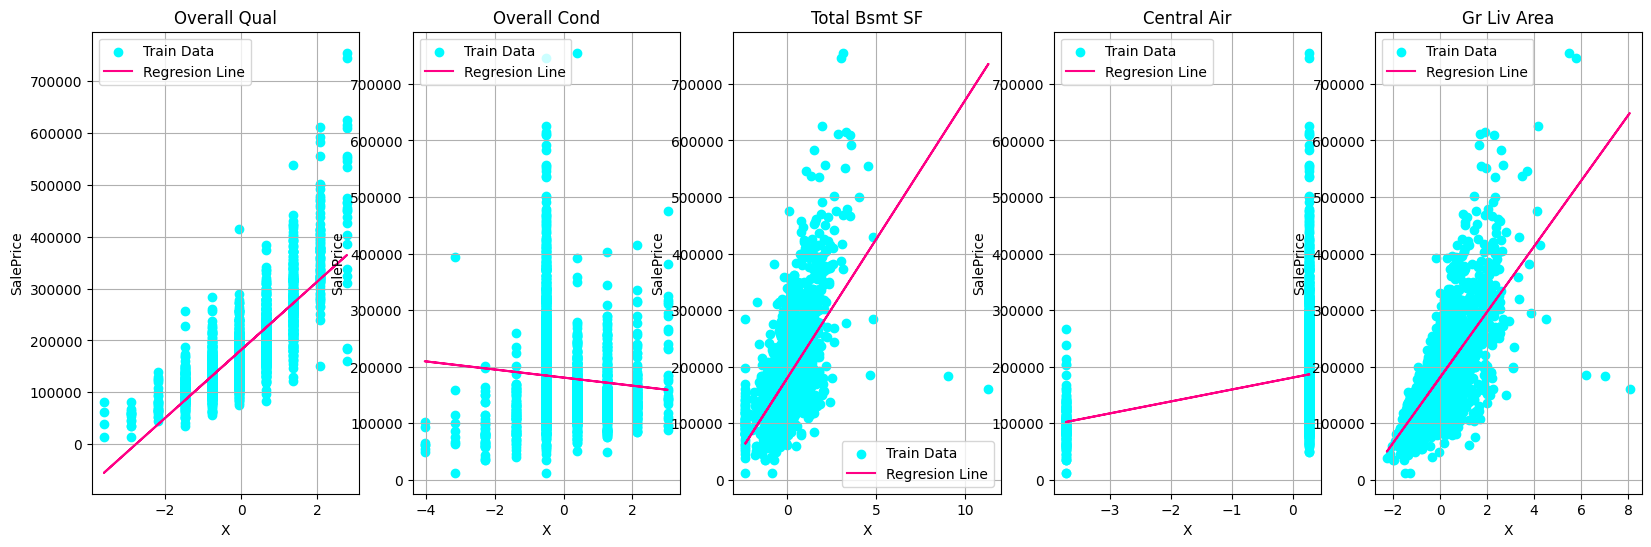

In [ ]:
fig, axes = plt.subplots(1, len(X_train.columns), figsize=(20, 6))

for i in range(5):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)

  axes[i].scatter(transformed_train.iloc[:,i], y_values, label='Train Data', color='#00FBFF')
  model = model_result[X_train.columns[i]]
  predicted = model.predict(X_values)

  axes[i].plot(transformed_train.iloc[:,i], predicted, color='#FF0085', label='Regresion Line')
  axes[i].set_title(X_train.columns[i])
  axes[i].set_xlabel('X')
  axes[i].set_ylabel('SalePrice')
  axes[i].grid()
  axes[i].legend()

suponga que recibe un nuevo dataset con 100 características ¿es viable probar todas las
combinaciones? ¿Cuántas modelos se generarían?

RTA: Con el último paso realizado en el análisis exploratorio se puede realizar un análisis automático de, por ejemplo, cuales son las 10 características que más influyen entre esas 100, esto para no tener una sobrecarga de datos y que incluso el modelo no sea óptimo debido a su gran tamaño, por eso con 10 se puede hacer más viable(dependiendo de la cantidad de filas por características) y se podría seguir haciendo un análisis de ese dataset.

Seleccione los 5 modelos con el coeficiente de determinación más alto y compárelos con un
diagrama de barras.

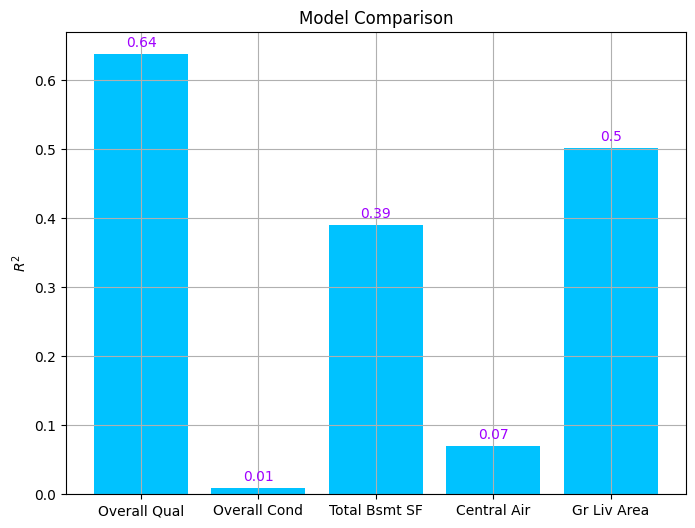

In [ ]:
scores = []
for i, feature in enumerate(X_train.columns):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  scores.append(model.score(X_values, y_values))

plt.figure(figsize=(8,6))
plt.bar(X_train.columns, scores, color='#00C2FF')
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center', color='#A000FF')

add_labels(X_train.columns, scores)

Genere los diagramas de residuos para los modelos seleccionados utilizando el conjunto de datos de entrenamiento

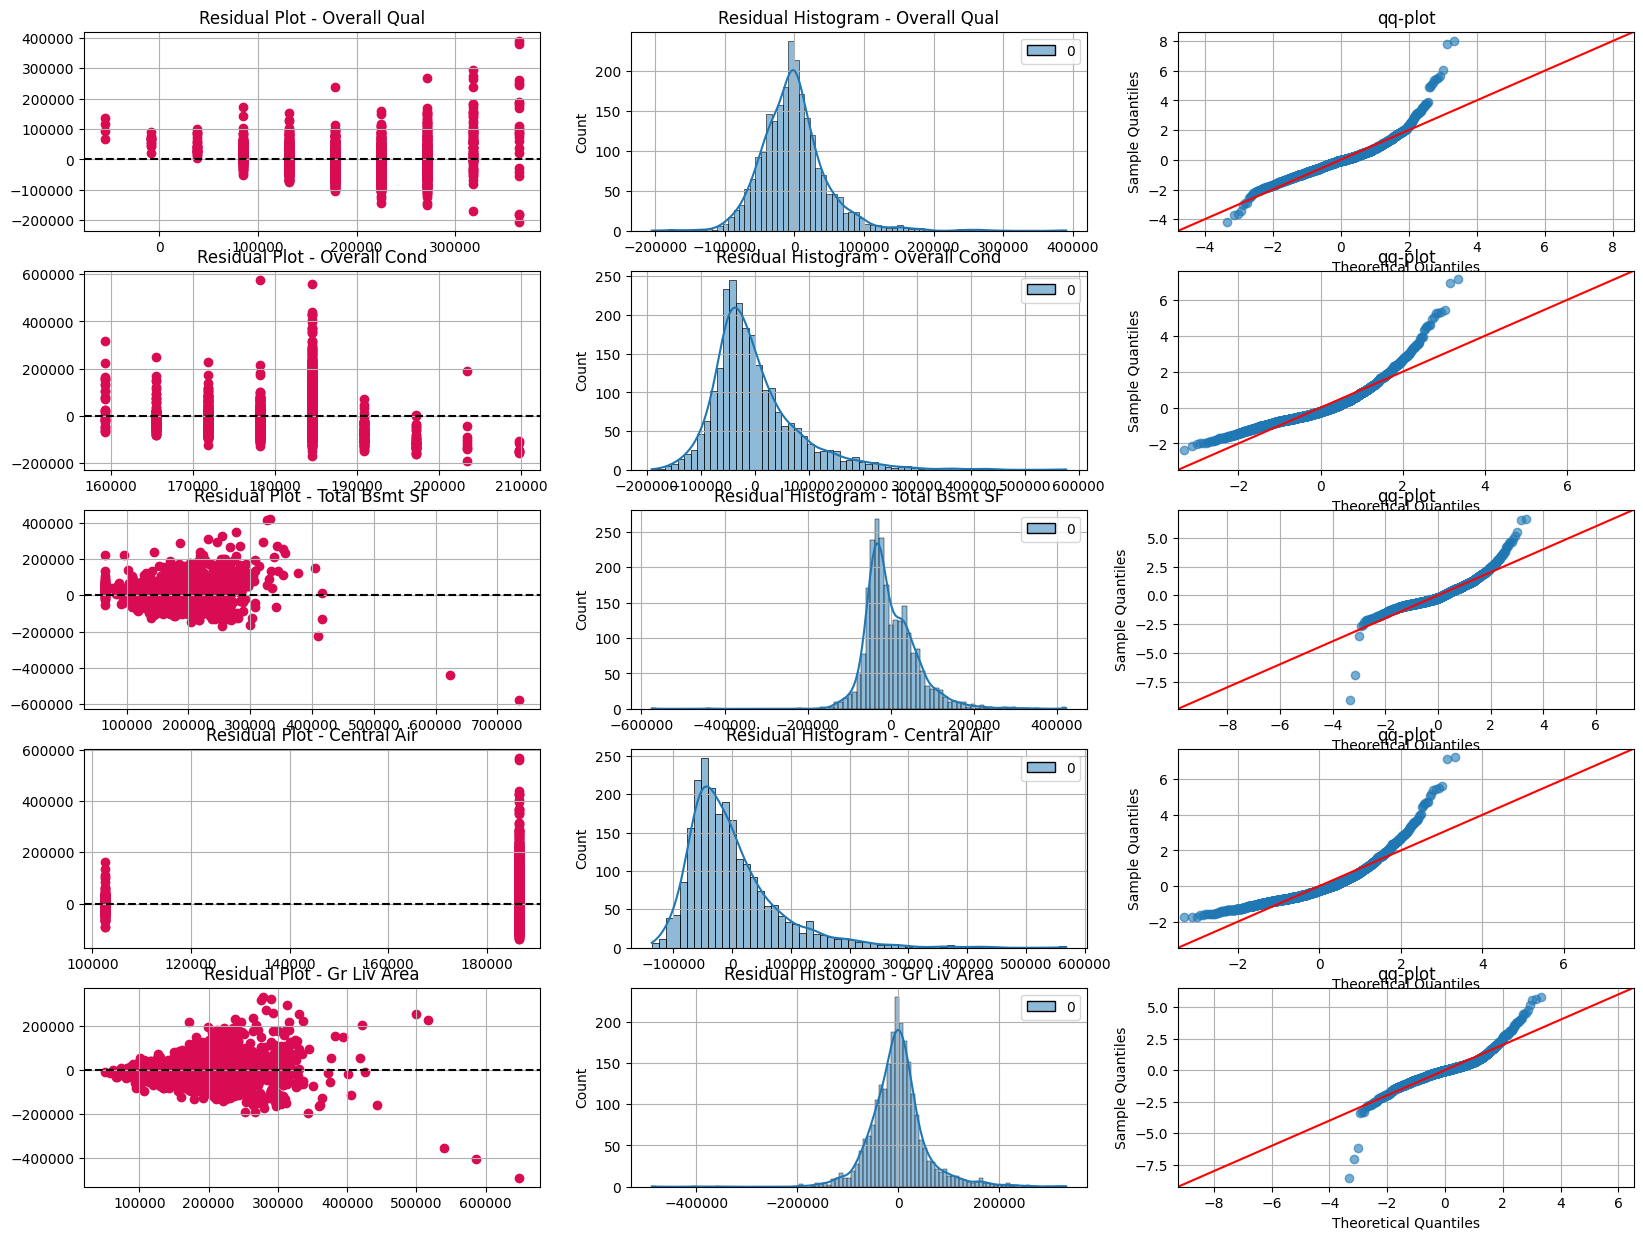

In [ ]:
selected = ['Overall Qual',
            'Overall Cond',
            'Total Bsmt SF',
            'Central Air',
            'Gr Liv Area']
residuals_train = {}
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

for i, feature in enumerate(selected):

  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1)
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='BLACK', linestyle='--')
  axes[i][0].scatter(y_pred, residual, color='#D80B53')
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature, )
  qqplot(np.sort(residual.flatten()), fit=True, line="45",
        ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()

# __Evaluación de desempeño__

Evalúe cada modelo con los datos de prueba. Recuerde utilizar el pipeline realizar las
estimaciones.

In [ ]:
from itertools import combinations

all_combinatios = []
model_final = {}
features = ['Overall Qual',
            'Overall Cond',
            'Total Bsmt SF',
            'Central Air',
            'Gr Liv Area']
final_scores = []
for i in range(1, 4):
  all_combinatios += list(combinations(features, i))

all_combinatios = [list(combination) for combination in all_combinatios]
all_combinatios

[['Overall Qual'],
 ['Overall Cond'],
 ['Total Bsmt SF'],
 ['Central Air'],
 ['Gr Liv Area'],
 ['Overall Qual', 'Overall Cond'],
 ['Overall Qual', 'Total Bsmt SF'],
 ['Overall Qual', 'Central Air'],
 ['Overall Qual', 'Gr Liv Area'],
 ['Overall Cond', 'Total Bsmt SF'],
 ['Overall Cond', 'Central Air'],
 ['Overall Cond', 'Gr Liv Area'],
 ['Total Bsmt SF', 'Central Air'],
 ['Total Bsmt SF', 'Gr Liv Area'],
 ['Central Air', 'Gr Liv Area'],
 ['Overall Qual', 'Overall Cond', 'Total Bsmt SF'],
 ['Overall Qual', 'Overall Cond', 'Central Air'],
 ['Overall Qual', 'Overall Cond', 'Gr Liv Area'],
 ['Overall Qual', 'Total Bsmt SF', 'Central Air'],
 ['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area'],
 ['Overall Qual', 'Central Air', 'Gr Liv Area'],
 ['Overall Cond', 'Total Bsmt SF', 'Central Air'],
 ['Overall Cond', 'Total Bsmt SF', 'Gr Liv Area'],
 ['Overall Cond', 'Central Air', 'Gr Liv Area'],
 ['Total Bsmt SF', 'Central Air', 'Gr Liv Area']]

In [ ]:
for combination in all_combinatios:
   sgd = SGDRegressor()
   X_values = X_train[combination].values.reshape(-1, len(combination))
   y_values = y_train.ravel()

   regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", SGDRegressor())])

   regressorSGD.fit(X_values, y_values)
   y_pred = regressorSGD.predict(X_values)
   model_final[combination.__repr__()] = regressorSGD
   final_scores.append(regressorSGD.score(X_values, y_values))

In [ ]:
test_scores = []

X_test, y_test = test.drop('SalePrice', axis='columns'), test['SalePrice']

for combination in all_combinatios:

  X_values = X_test[combination].values.reshape(-1,len(combination))
  y_values = y_test.values.reshape(-1, 1)

model = model_final[combination.__repr__()]
test_scores.append(model.score(X_values, y_values))

In [ ]:
print('X_values: ',X_values.shape, ',', 'y_values: ',y_values.shape)

X_values:  (586, 3) , y_values:  (586, 1)


Compare los coeficientes de determinación de los datos de prueba con lo obtenidos en los datos de entrenamiento a través de un gráfico de barras.


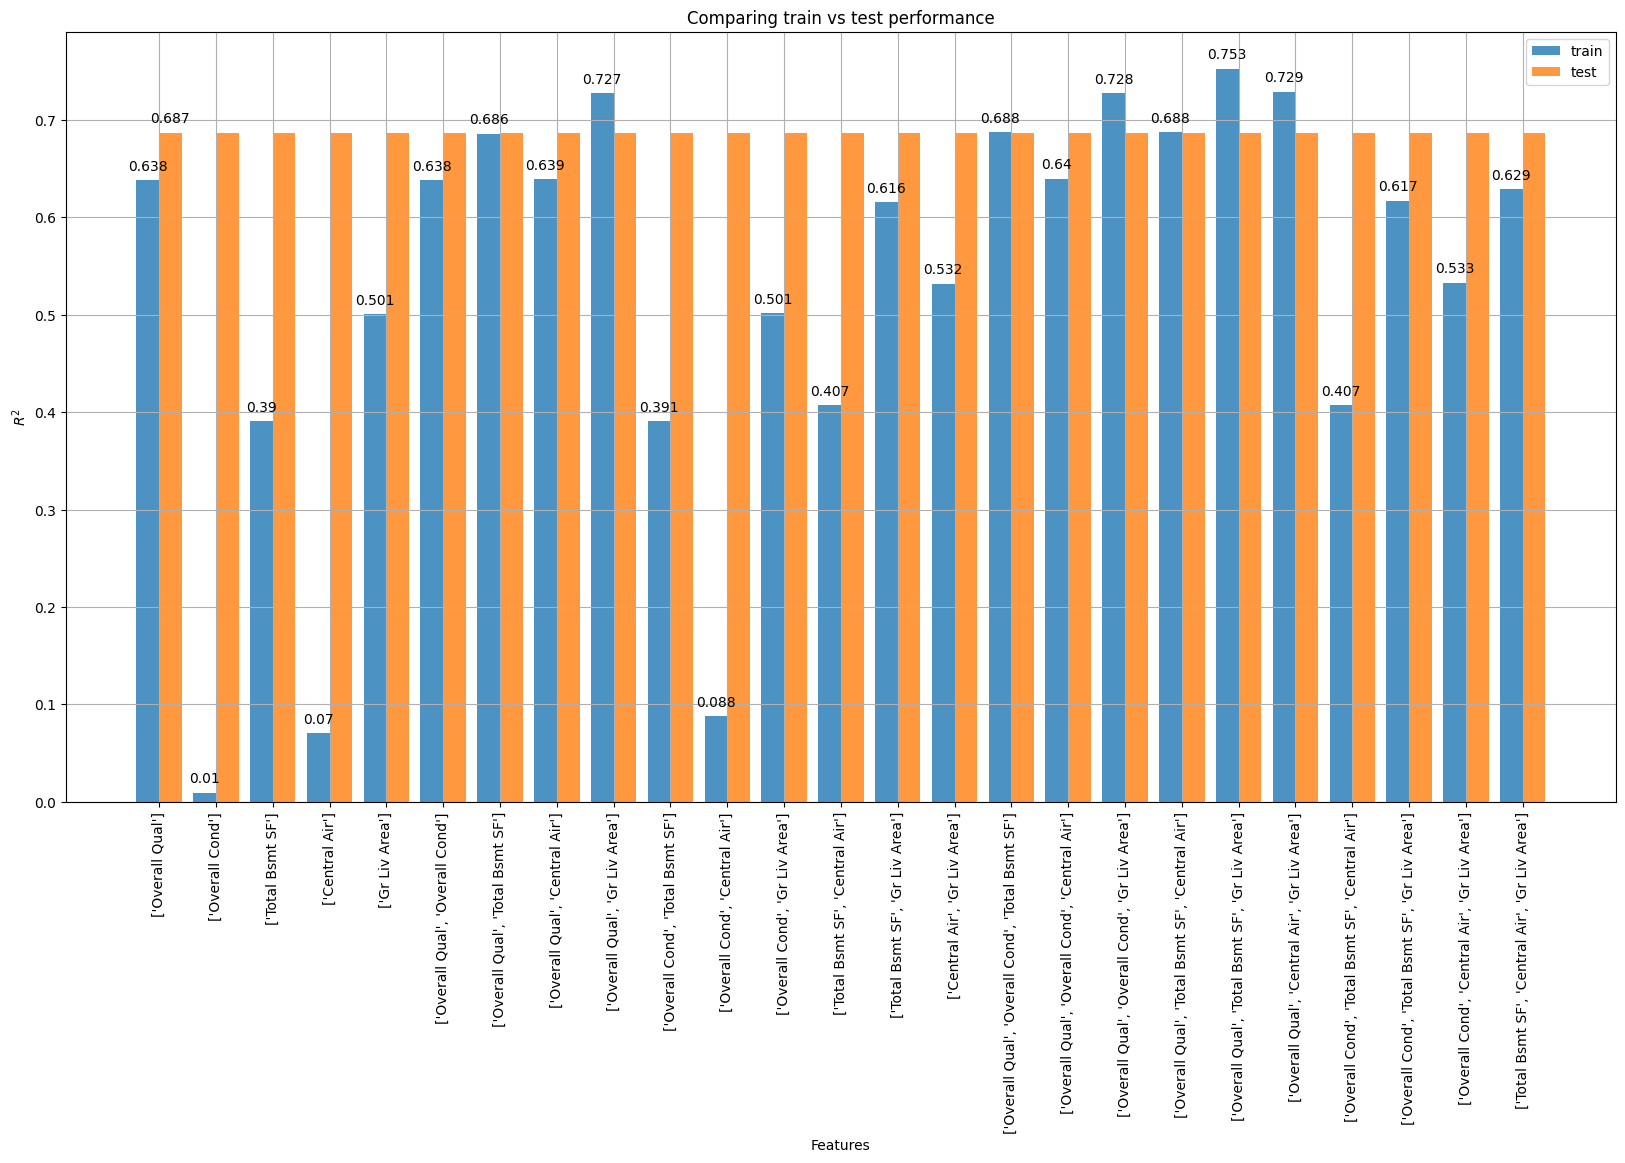

In [ ]:
plt.figure(figsize=(20,10))

X_axis = np.arange(len(model_final.keys()))

plt.bar(X_axis - 0.2, final_scores, 0.4, label = 'train', alpha=0.8)
plt.bar(X_axis + 0.2,test_scores, 0.4, label = 'test', alpha=0.8)

plt.ylabel('$R^2$')
plt.title('Test Comparison')
plt.grid()
plt.xticks(X_axis, model_final.keys())
plt.xlabel("Features")
plt.xticks(rotation = 90)
plt.title("Comparing train vs test performance")
plt.legend()

def addlabels(x, y, val):
    for i in range(len(y)):
        plt.text(i + val , y[i] + 0.01, round(y[i],3), ha = 'center')

addlabels(model_final.keys(), final_scores, - 0.2)
addlabels(model_final.keys(), test_scores, + 0.2)
plt.show()

Realice el análisis de residuos para el conjunto de prueba. Compare los resultados obtenidos con los datos de entrenamiento.

/root/venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/root/venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/root/venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/root/venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argum

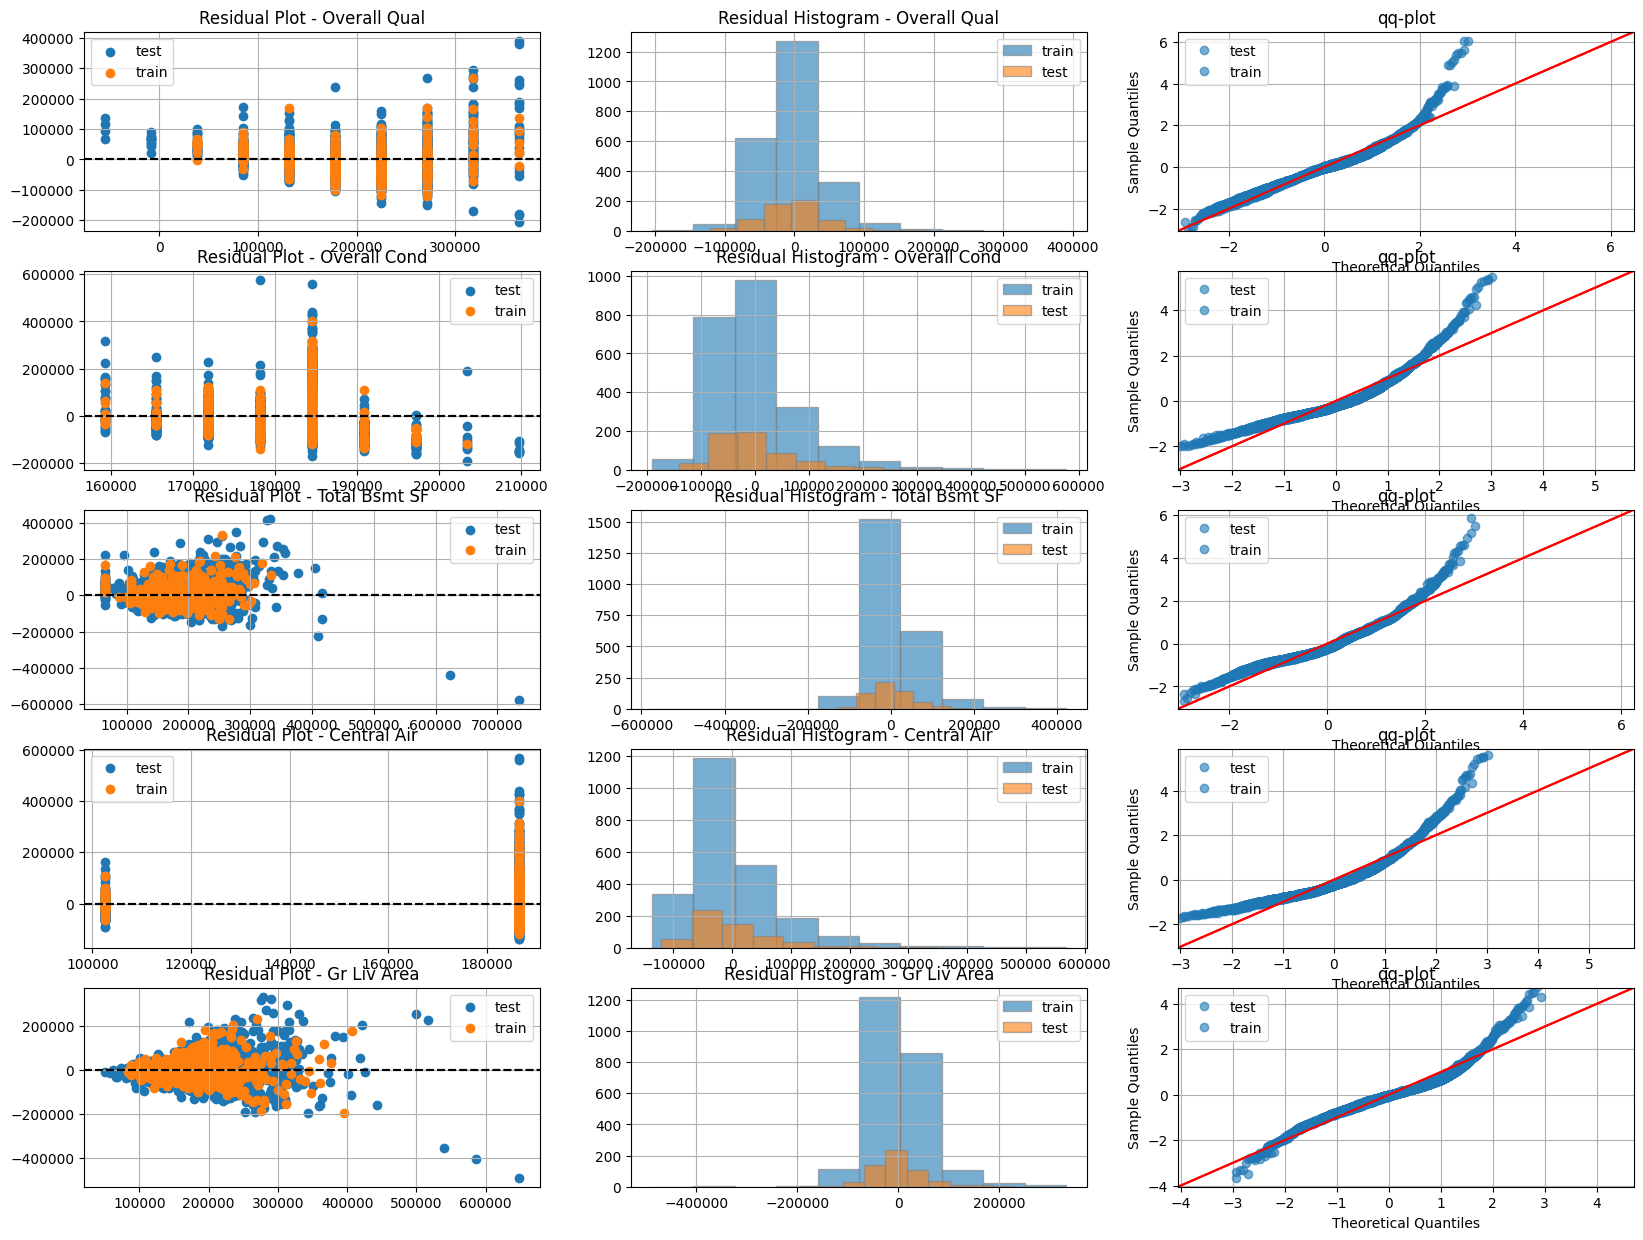

In [ ]:
selected = ['Overall Qual',
            'Overall Cond',
            'Total Bsmt SF',
            'Central Air',
            'Gr Liv Area']
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

for i, combination in enumerate(selected):

  X_train_values = X_train[combination].values.reshape(-1,1)
  residual_ = residuals_train[combination]

  X_test_values = X_test[combination].values.reshape(-1,1)
  y_values = y_test.values.reshape(-1, 1)
  model = model_result[combination]
  y_pred = model.predict(X_test_values)
  y_pred_ = model.predict(X_train_values)
  residual = y_values - y_pred.reshape(-1,1)
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred_, residual_, label='test')
  axes[i][0].set_title('Residual Plot - ' +  feature)

  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual, label='train')
  axes[i][0].set_title('Residual Plot - ' +  combination)
  axes[i][0].legend()
  axes[i][0].grid()

  axes[i][1].hist(residual_, alpha= 0.6, ec="grey", label='train')
  axes[i][1].hist(residual, alpha= 0.6, ec="grey", label='test')
  axes[i][1].set_title('Residual Histogram - ' +  combination)
  axes[i][1].legend()
  axes[i][1].grid()

  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, label='test')
  axes[i][2].set_title('qq-plot')
  qqplot(np.sort(residual_.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, color='orange', label='train')
  axes[i][2].set_title('qq-plot')
  axes[i][2].grid()
  axes[i][2].legend()

¿Se podría mejorar el modelo agregando relaciones no lineales?

RTA: Observando el gráfico QQ tenemos que los datos de testeo son la mayoría del dataset y viendo su forma, no es totalmente lineal, lo cual nos da a entender que al aplicar alguna regresión no lineal nos puede dar un modelo más acertado y que de más respuestas que un modelo de relaciones lineales.

Calcule las siguientes métricas: MAE, MSE y RMSE. ¿Cuál sería la más adecuada para este problema?

In [ ]:
regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDRegressor())])

In [ ]:
predicted_profit = regressor.predict(X_test)

In [ ]:
print('MAE: ', mean_absolute_error(y_test, predicted_profit))
print('MSE: ', mean_squared_error(y_test, predicted_profit))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predicted_profit)))

MAE:  24043.693132505414
MSE:  1090255646.6554391
RMSE:  33019.01946841304


RTA: Observamos que el menor error se presenta en el error absoluto medio, siendo incluso menor a la raiz del error cuadratico medio. MAE es la métrica más indicada.

# __Selección del modelo__

Seleccione el modelo que a su modo de ver ofrece una mejor solución. Explique su respuesta.

In [ ]:
for feature in X_train.columns:
    linelLR= Pipeline(steps=[("numerical_imputer",
                                  SimpleImputer(strategy='mean')),
                                 ("scaler", StandardScaler()),
                                 ("lr", LinearRegression())])
    linelLR.fit(X_train[feature].values.reshape(-1,1), y_train)
    model_result[feature] = linelLR

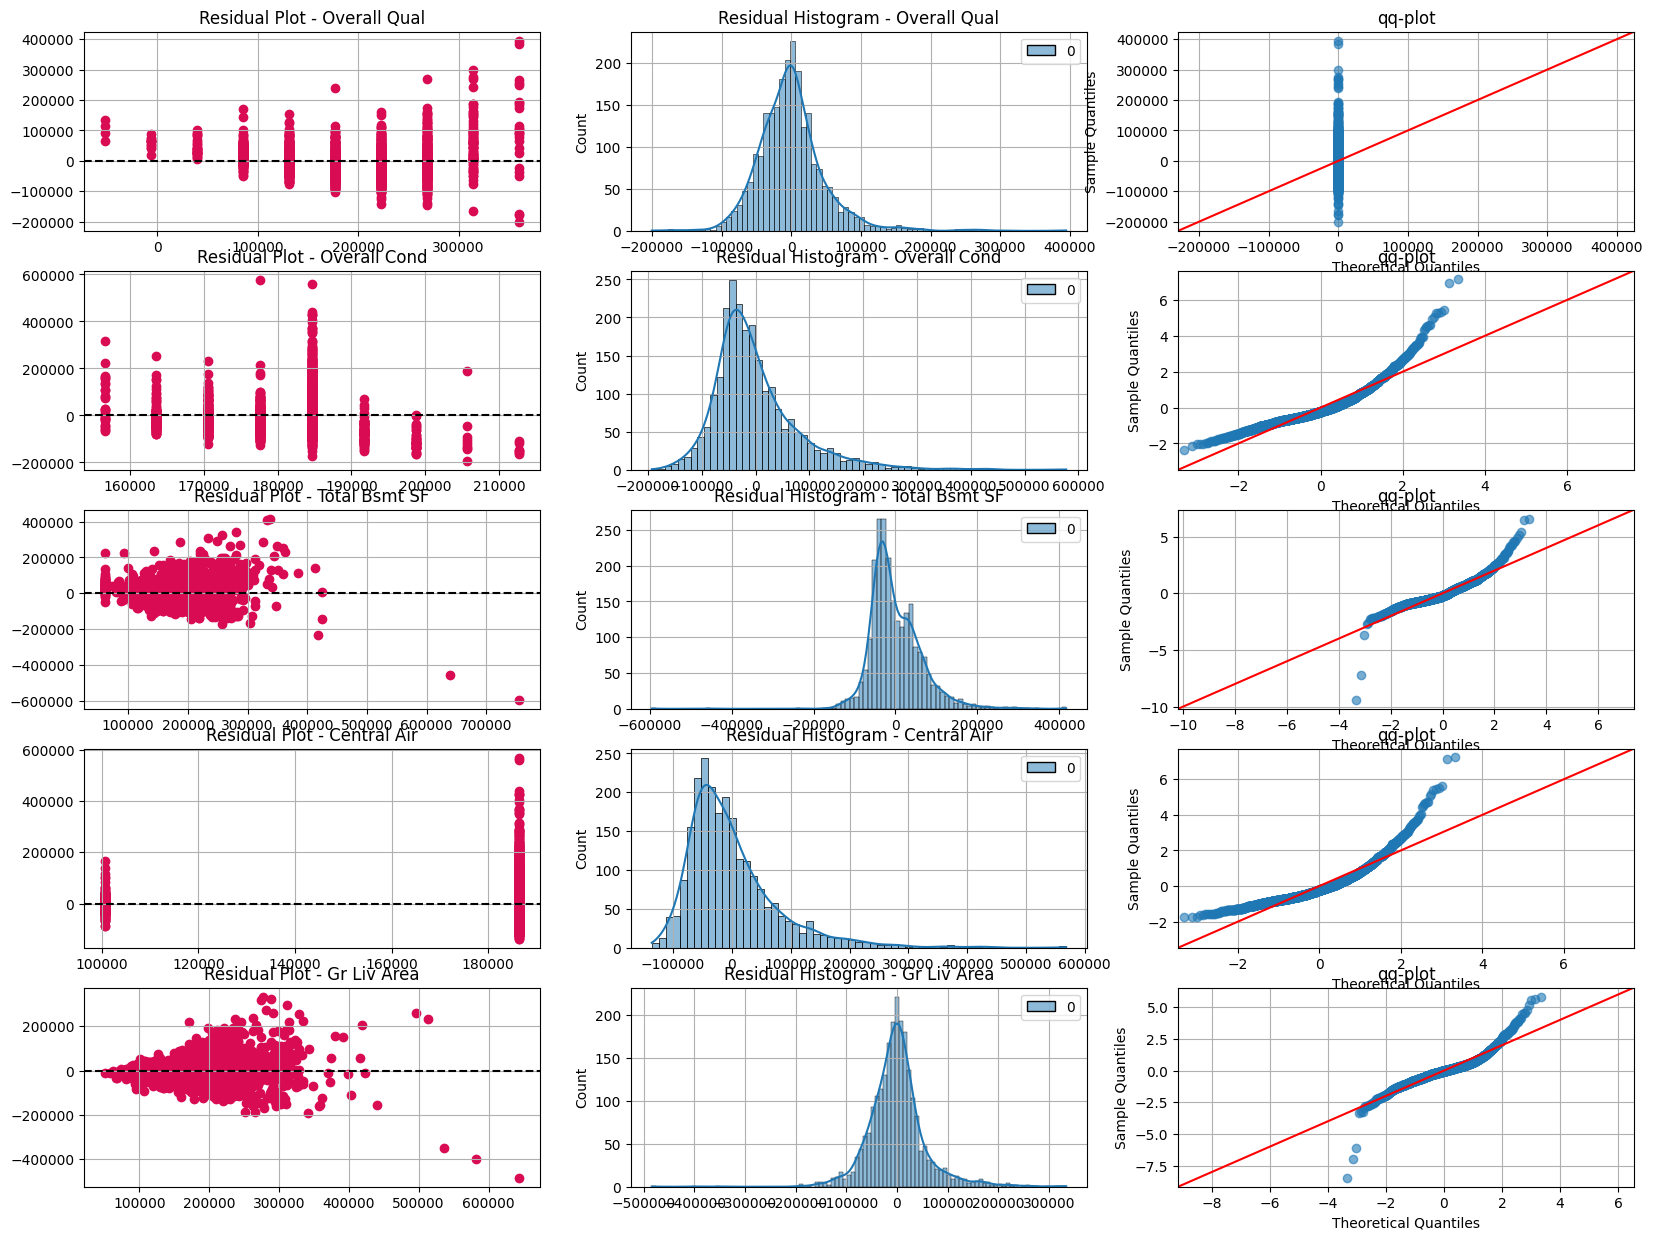

In [ ]:
selected = ['Overall Qual',
            'Overall Cond',
            'Total Bsmt SF',
            'Central Air',
            'Gr Liv Area']
residuals_train = {}
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

for i, feature in enumerate(selected):

  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1)
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='BLACK', linestyle='--')
  axes[i][0].scatter(y_pred, residual, color='#D80B53')
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature, )
  qqplot(np.sort(residual.flatten()), fit=True, line="45",
        ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()

In [ ]:
linelLR.fit(X_train, y_train)

Pipeline(steps=[('numerical_imputer', SimpleImputer()),
                ('scaler', StandardScaler()), ('lr', LinearRegression())])

In [ ]:
predicte_profit = linelLR.predict(X_test)
print('MAE:', mean_absolute_error(y_test, predicte_profit))
print('MSE:', mean_squared_error(y_test, predicte_profit))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicte_profit)))

MAE: 24064.58177922637
MSE: 1090261916.1415486
RMSE: 33019.11440577334


RTA: Aunque el coeficiente de determinación es más alto en Overall Qual, el modelo que ofrece mejor solución Gr Liv Area ya que los datos datos que este se encuentran más nivelados porque estos solo pueden ser números del 1 al 10, mientras que en la superficie habitable podremos conocer más precisamente si la casa, como dice la variable, tiene un mayor espacio para la ubicación de las personas dentro de ella, ya que vemos que su precisión es parecida a las calificaciones de las casas, pero esto mostrandose valores siendo ingresados casi siempre distintos por cada casa, demostrando mejor la precisión de este modelo.

Para así en caso de ser necesitado un estudio es mejor enfocarse en lo que mejor conocemos que son las superficies habitables.

¿Considera que los datos proporcionados por la empresa son suficientes? ¿Son los adecuados? Presente algunas sugerencias para mejorar el estado actual del modelo.

RTA: Aunque serían ya variables categóricas, se puede agregar la zona en donde se encuentra la casa y diviendo esta zona según el entorno en donde se encuentre, para así cuando se busque una casa se sepa el lugar en donde la está buscando.

En un párrafo, escriba su recomendación para la empresa.

RTA: Se recomienda a la empresa colocar la ubicacíon de la zona, barrio o ciudad en donde se estén distribuyendo cada casa, para que así se conozca en donde se encuentran las mejores casas, las casas más seguras, y para que así se pueda conocer mejor lo que se encuentra alrededor de cada casa.

# 3.

A partir de lo aprendido en el curso de Kaggle “Introduction to machine learning” genere dos nuevos modelos utilizando árboles de decisión y bosques aleatorios. Compare ambos modelos con el seleccionado en el punto anterior. Compare las gráficas de residuos, el error cuadrado absoluto y los coeficientes de determinación.


In [ ]:
arbolDecision = DecisionTreeRegressor(random_state=1)
arbolDecision.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
model_pred = arbolDecision.predict(X_test)

In [ ]:
for feature in X_train.columns:

  decisionDTC = Pipeline(steps=[("numerical_imputer",
                                  SimpleImputer(strategy='mean')),
                                 ("scaler", StandardScaler()),
                                 ("dtc", DecisionTreeRegressor())])
  decisionDTC.fit(X_train[feature].values.reshape(-1,1), y_train)
  model_result[feature] = decisionDTC

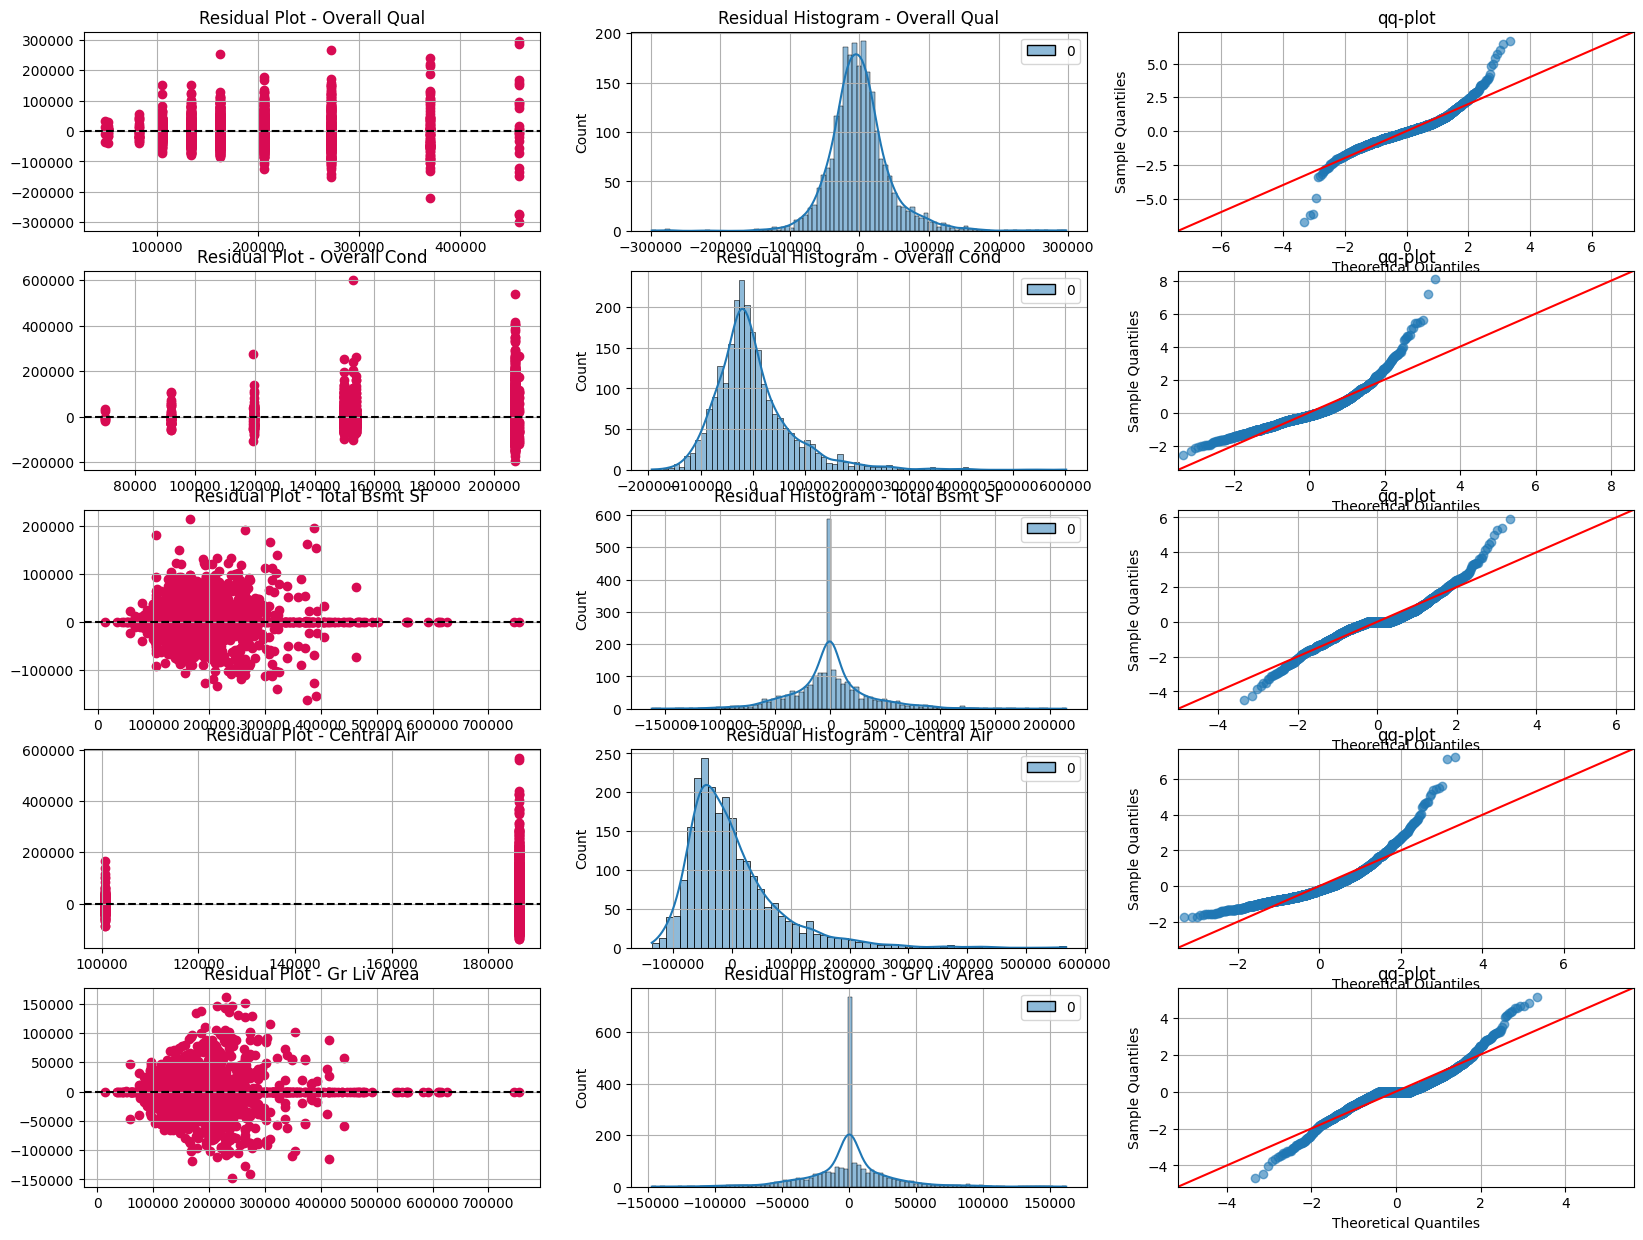

In [ ]:
selected = ['Overall Qual',
            'Overall Cond',
            'Total Bsmt SF',
            'Central Air',
            'Gr Liv Area']
residuals_train = {}
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

for i, feature in enumerate(selected):

  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1)
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='BLACK', linestyle='--')
  axes[i][0].scatter(y_pred, residual, color='#D80B53')
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature, )
  qqplot(np.sort(residual.flatten()), fit=True, line="45",
        ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()

In [ ]:
decisionDTC = decisionDTC.fit(X_train, y_train)
predicte_profit = decisionDTC.predict(X_test)
print('MAE:', mean_absolute_error(y_test, predicte_profit))
print('MSE:', mean_squared_error(y_test, predicte_profit))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicte_profit)))

MAE: 26514.008115959692
MSE: 1388008970.5952177
RMSE: 37255.99241189554


In [ ]:
train_score = decisionDTC.score(X_train, y_train)
print("Coefficient of determination in the training set: ", train_score)

Coefficient of determination in the training set:  0.9971939956229449


In [ ]:
randomForest = RandomForestRegressor(random_state=1)
randomForest.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
randomForest_pred = randomForest.predict(X_test)

In [ ]:
for feature in X_train.columns:

  randomRFR = Pipeline(steps=[("numerical_imputer",
                                  SimpleImputer(strategy='mean')),
                                 ("scaler", StandardScaler()),
                                 ("rfr", RandomForestRegressor())])
  randomRFR.fit(X_train[feature].values.reshape(-1,1), y_train)
  model_result[feature] = randomRFR

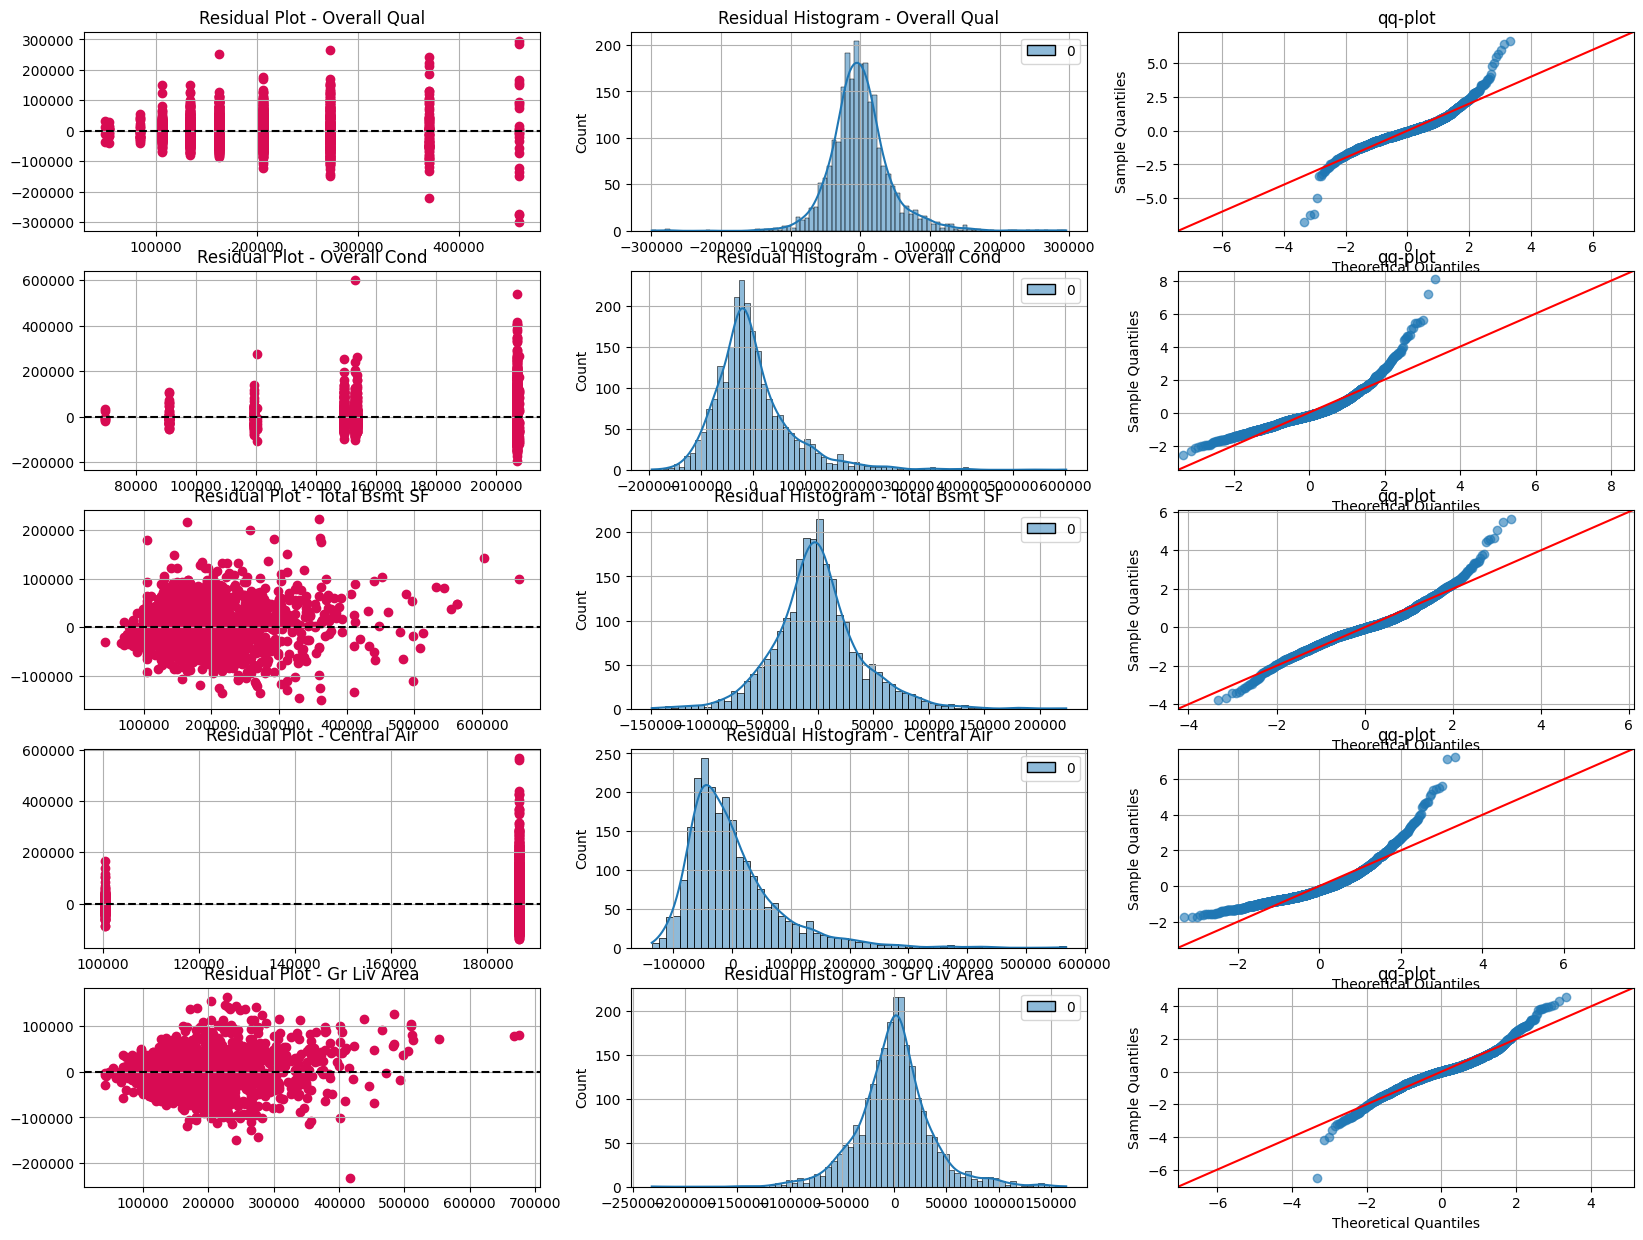

In [ ]:
selected = ['Overall Qual',
            'Overall Cond',
            'Total Bsmt SF',
            'Central Air',
            'Gr Liv Area']
residuals_train = {}
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

for i, feature in enumerate(selected):

  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1)
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='BLACK', linestyle='--')
  axes[i][0].scatter(y_pred, residual, color='#D80B53')
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature, )
  qqplot(np.sort(residual.flatten()), fit=True, line="45",
        ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()

In [ ]:
randomRFR = randomRFR.fit(X_train, y_train)
predicte_profit = randomRFR.predict(X_test)
print('MAE:', mean_absolute_error(y_test, predicte_profit))
print('MSE:', mean_squared_error(y_test, predicte_profit))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicte_profit)))

MAE: 20836.35672909329
MSE: 842564730.8249464
RMSE: 29026.965580731074


In [ ]:
train_score = randomRFR.score(X_train, y_train)
print("Coefficient of determination in the training set: ", train_score)

Coefficient of determination in the training set:  0.975173824745142


En la parte del error mostrado por los arboles de decisión vemos un mayor error que genera menos seguridad, mientras que en el bosque aleatorio se presencia un menor y mejor error. Por parte del coeficiente de determinación, se muestra de mejor manera el de los arboles de decisión.

Ahora respecto a la comparación de los últimos errores calculados con el error elegido anteriormente, podemos ver que el modelo de bosques aleatorios es el de mayor precisión y menor error.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c839592-694a-4857-aa73-a084e1af5010' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>